In [20]:
! git pull origin main

Updating f8f10ae..e09ba0a
Fast-forward
 Heart Disease Dataset 4.xlsx | Bin 0 -> 107072 bytes
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 Heart Disease Dataset 4.xlsx


From https://github.com/fzi2000/Dissertation_HeartDisease
 * branch            main       -> FETCH_HEAD
   f8f10ae..e09ba0a  main       -> origin/main


# Cardiovascular Disease Prediction using Machine Learning

In this project, we predict the possibility of (cardiovascular) heart disease in individuals.

## 1. Introduction and Objectives

O1: Conduct a detailed study on cardiovascular diseases - Research and understand the
basic concepts of CVD and its risk factors.
O2: Perform Exploratory Data Analysis (EDA)- Apply appropriate data preprocessing
techniques to ensure the dataset used in this study is of high quality.
2 • Fathima Zaineb Ismath
O3: Evaluate Established Machine Learning Models- Investigate and evaluate the suitability of various models, such as Logistic Regression, Random Forests, and Deep learning
techniques, for predicting cardiovascular disease.
O4: Optimal Feature Selection- Identify significant predictive features whose presence
improves the accuracy of CVD prediction.
O5: Machine Learning Model Development- Develop a model for predicting cardiovascular
diseases with various ML algorithms, deep learning techniques, and risk stratification.
O6: Model Performance Evaluation- Evaluate the developed model to check its predictive
accuracy and interpretability by employing relevant evaluation metrics.


### Attribute Description

**1. age**  
- Patient's age in years.

**2. sex**  
- Gender:  
  - `1`: Male  
  - `0`: Female  

**3. cp**  
- Chest pain types:  
  - `0`: Typical angina  
  - `1`: Atypical angina  
  - `2`: Non-anginal pain  
  - `3`: Asymptomatic  

**4. trestbps**  
- Resting blood pressure (mm Hg). Values above 130-140 are concerning.

**5. chol**  
- Serum cholesterol (mg/dl). Values above 200 are concerning.

**6. fbs**  
- Fasting blood sugar:  
  - `1`: >120 mg/dl  
  - `0`: <=120 mg/dl  
- Values >126 mg/dl indicate diabetes.

**7. restecg**  
- Resting electrocardiographic results:  
  - `0`: Normal  
  - `1`: ST-T wave abnormality  
  - `2`: Left ventricular hypertrophy  

**8. thalach**  
- Maximum heart rate achieved during exercise.

**9. exang**  
- Exercise-induced angina:  
  - `1`: Yes  
  - `0`: No  

**10. oldpeak**  
- ST depression during exercise compared to rest (measures heart stress).

**11. slope**  
- Slope of the peak exercise ST segment:  
  - `0`: Upsloping  
  - `1`: Flat-sloping  
  - `2`: Down-sloping  

**12. ca**  
- Number of major vessels (0-3) colored by fluoroscopy:  
  - More blood flow (colored vessels) indicates a healthier heart.

**13. stress test result:  
  - `1`: Normal  
  - `3`: Normal  
  - `6: Fixed de
    
**14. num**eart disease present & 1 iicates gnosis of heart disease:
tatus):
  - `0`: No heart disease.
  - `1`: Heart disease present.


In [25]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
import shap
import gradio as gr
import hvplot.pandas

In [71]:
heart_data = pd.read_excel('Heart Disease Dataset 4.xlsx')
# Print the first few lines of the dataset
print(heart_data.head()) 

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0     2.30      3   
1   67    1   4       160   286    0        2      108      1     1.50      2   
2   67    1   4       120   229    0        2      129      1     2.60      2   
3   37    1   3       130   250    0        0      187      0     3.50      3   
4   41    0   2       130   204    0        2      172      0     1.40      1   

    ca thal  num  
0  0.0  6.0    0  
1  3.0  3.0    2  
2  2.0  7.0    1  
3  0.0  3.0    0  
4  0.0  3.0    0  


## 2. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a critical step in understanding the structure, relationships, and patterns in the dataset. Below, we perform detailed analyses using descriptive statistics, visualizations, and correlation heatmaps to uncover key insights about heart disease.

In [75]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [77]:
# Checking the data shape
heart_data.shape

(303, 14)

The dataset has 303 rows and 14 columns for different attributes

In [80]:
# Check for Missing Values
print("Missing Values:\n", heart_data.isnull().sum())

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [87]:
# Map values for visualization
heart_data['disease_status'] = heart_data['num'].map(lambda x: 'No Heart Disease' if x == 0 else 'Heart Disease Present')

# Plot the grouped data
heart_data['disease_status'].value_counts().hvplot.bar(
    title="Heart Disease Count",
    xlabel='Heart Disease Status',
    ylabel='Count',
    width=500,
    height=350
)


:Bars   [disease_status]   (count)

164 individuals in the dataset have heart disease, and 139 do not, indicating a balanced dataset for analysis.

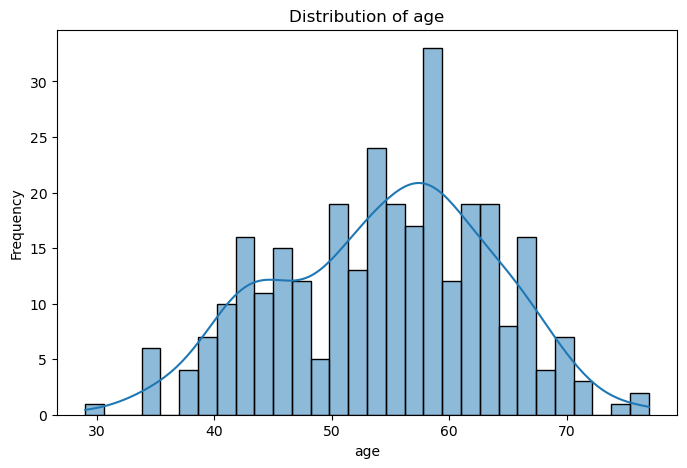

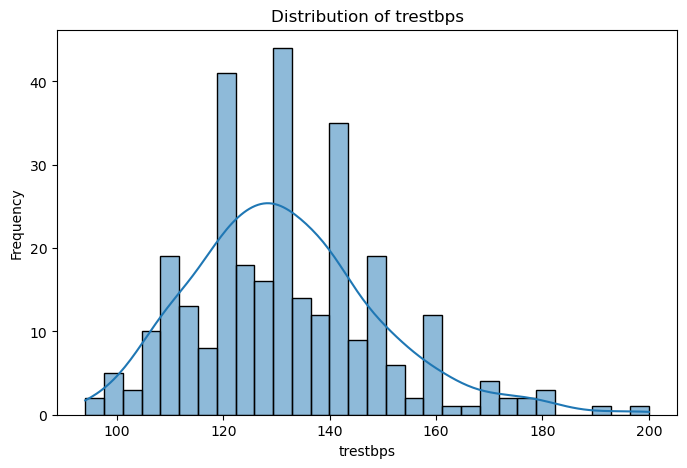

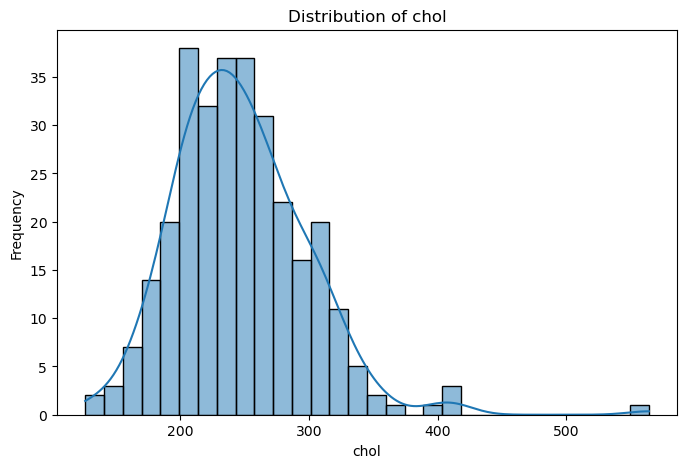

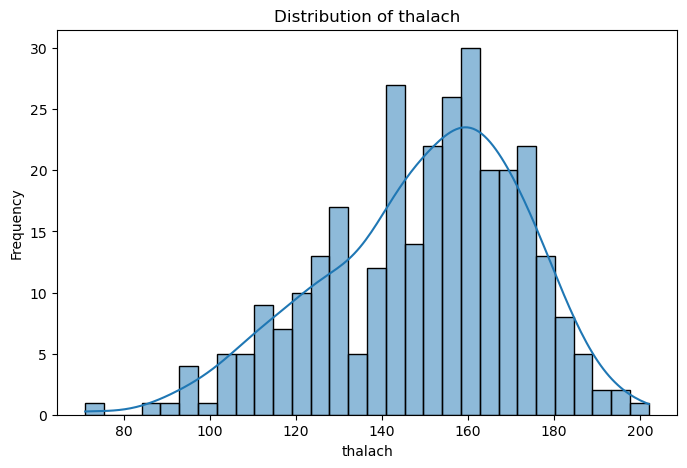

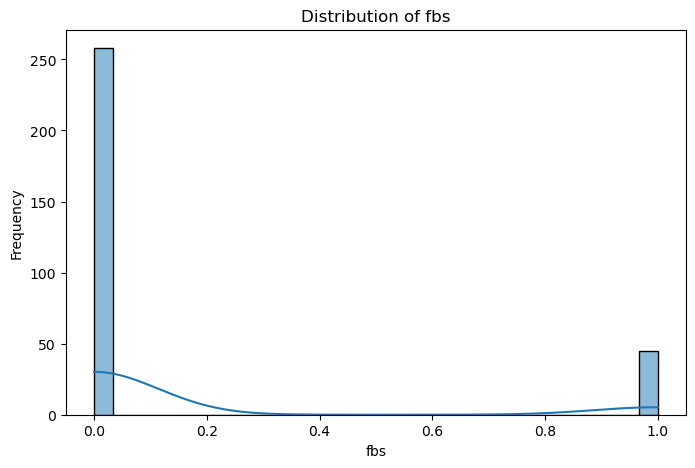

In [90]:
# Distribution of key numeric features
key_features = ['age', 'trestbps', 'chol', 'thalach', 'fbs']
for feature in key_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(heart_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

In [91]:
# Drop 'disease_status' column after plotting
heart_data = heart_data.drop(columns=['disease_status'])

# Statistical measure of data
pd.set_option("display.float", "{:.2f}".format)
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.44,0.68,3.16,131.69,246.69,0.15,0.99,149.61,0.33,1.04,1.60,0.94
std,9.04,0.47,0.96,17.60,51.78,0.36,0.99,22.88,0.47,1.16,0.62,1.23
min,29.00,0.00,1.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,1.00,0.00
25%,48.00,0.00,3.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00
50%,56.00,1.00,3.00,130.00,241.00,0.00,1.00,153.00,0.00,0.80,2.00,0.00
75%,61.00,1.00,4.00,140.00,275.00,0.00,2.00,166.00,1.00,1.60,2.00,2.00
max,77.00,1.00,4.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,3.00,4.00


In [43]:
# Explanation for 'target' column
# Target: Diagnosis of heart disease (angiographic disease status)
# Value 0: < 50% diameter narrowing (Low Risk)
# Value 1: > 50% diameter narrowing (High Risk)
# Values > 1 (2, 3, 4) likely indicate more specific categorizations for different severities or errors in encoding.

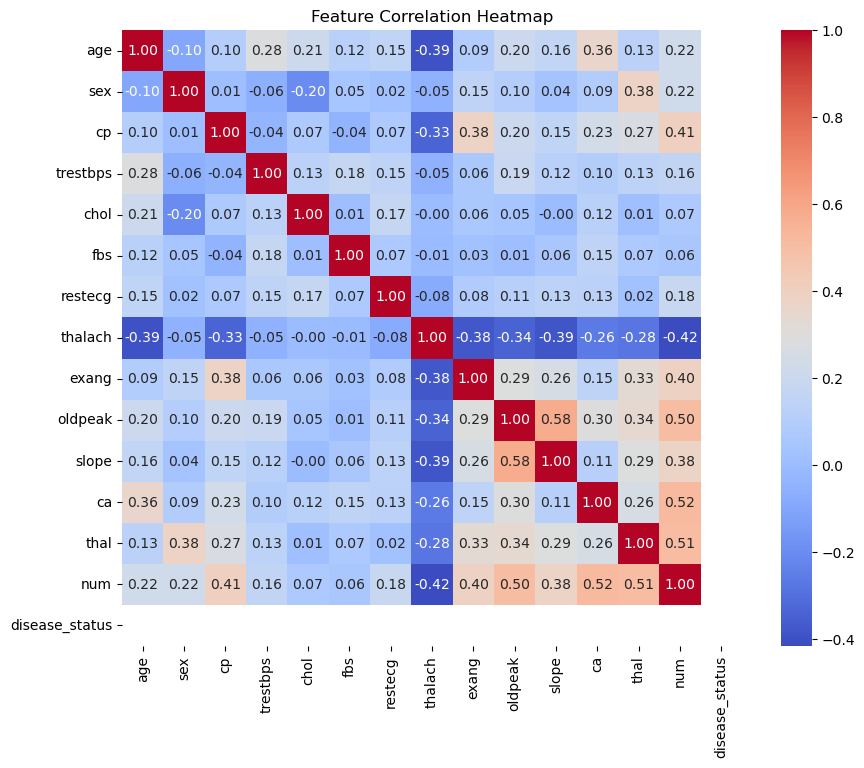

In [44]:
# Convert all columns to numeric where possible
heart_data = heart_data.apply(pd.to_numeric, errors='coerce')

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heart_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [94]:
# Select numeric data
numeric_data = heart_data.select_dtypes(include=['float64', 'int64'])

# Compute correlations with 'num'
correlations = numeric_data.drop('num', axis=1).corrwith(numeric_data['num'])

# Plot correlation using hvplot
import hvplot.pandas  # Ensure hvplot is imported
correlations.hvplot.barh(
    width=600, height=400,
    title="Correlation between Heart Disease and Numeric Features",
    ylabel='Correlation', xlabel='Numerical Features',
)

:Bars   [index]   (0)

fbs and chol are the lowest correlated with the target variable.
All other variables have a significant correlation with the target variable.

## 3. Data Processing 

After exploring the dataset,

In [108]:
# Convert 'ca' and 'thal' columns to integers
heart_data['ca'] = pd.to_numeric(heart_data['ca'], errors='coerce')  # Convert to numeric
heart_data['thal'] = pd.to_numeric(heart_data['thal'], errors='coerce')  # Convert to numeric

# Drop rows with NaN in 'ca' and 'thal'
heart_data.dropna(subset=['ca', 'thal'], inplace=True)

# Convert 'ca' and 'thal' to integers
heart_data['ca'] = heart_data['ca'].astype(int)
heart_data['thal'] = heart_data['thal'].astype(int)

# Relabel Target Column for Multi-Class Classification
def relabel_risk(target):
    if num == 0:
        return 0  # Low Risk
    elif num == 1:
        return 1  # Medium Risk
    else:
        return 2  # High Risk

# Update 'thal' Column
heart_data['thal'] = heart_data['thal'].replace({3: 0, 6: 1, 7: 2})  # 3 = Normal (0), 6 = Fixed Defect (1), 7 = Reversible Defect (2)

# Rename 'num' to 'target'
heart_data.rename(columns={'num': 'target'}, inplace=True)

heart_data.head()
heart_data.shape # Find out where the missing columns went

(297, 14)

In [110]:
# Normalize Selected Numerical Features
numerical_features = [ "trestbps", "chol", "thalach", "oldpeak"]
scaler = MinMaxScaler()
heart_data[numerical_features] = scaler.fit_transform(heart_data[numerical_features])

# Split Dataset into Features (X) and Target (Y)
X = heart_data.drop(columns=['target'])  # Features
y = heart_data['target']  # Target

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Output Dataset Shapes
print("Full Dataset Shape:", X.shape)
print("Training Dataset Shape:", X_train.shape)
print("Testing Dataset Shape:", X_test.shape)

Full Dataset Shape: (297, 13)
Training Dataset Shape: (237, 13)
Testing Dataset Shape: (60, 13)


## 4. Feature Selection and Importance 

In [139]:
# 3. SelectKBest Using Chi-Squared Test
# Note: Chi-squared requires non-negative data, so ensure normalization
from sklearn.feature_selection import chi2,SelectKBest
chi2_selector = SelectKBest(chi2, k=5)  # Select top 5 features
chi2_selector.fit(X, y)

chi2_selected_features = X.columns[chi2_selector.get_support()]
print("\nSelected Features by Chi-Squared Test:\n", chi2_selected_features)


Selected Features by Chi-Squared Test:
 Index(['age', 'cp', 'exang', 'ca', 'thal'], dtype='object')


In [147]:
# # Feature Importance
# from sklearn.feature_selection import rf
# feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
# feature_importances.sort_values(by='Importance', ascending=False, inplace=True)
# print("Feature Importances:\n", feature_importances)

# sns.barplot(x='Importance', y='Feature', data=feature_importances)
# plt.title("Feature Importances")
# plt.show()

In [164]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the Model
model = LogisticRegression(max_iter=500, solver='saga', random_state=42)

# Define K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform Cross-Validation
scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')

# Print Cross-Validation Results
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

# # Optional: Train the Model on Full Training Data
# model.fit(X, y)
# y_pred = model.predict(X)

# # Evaluate the Model
# print("\nModel Performance on Full Training Data:")
# print("Accuracy:", accuracy_score(y, y_pred))
# print(classification_report(y, y_pred))


K-Fold Cross-Validation Scores: [0.63333333 0.43333333 0.45762712 0.59322034 0.66101695]
Mean Accuracy: 0.5557062146892655
Standard Deviation: 0.09286362154913057
